In [1]:
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [7]:
#Loading the csv dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding = "ISO-8859-1")

In [8]:

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.dropna(how="any", inplace=True, axis=1)

In [10]:
df.columns=['Label','SMS']

In [11]:
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Adding a numerical variable i.e. 0 or 1 for ham or spam respectively.
df['Label_number']=''
df.head()

,Label,SMS,Label_number
0,ham,"Go until jurong point, crazy.. Available only ...",
1,ham,Ok lar... Joking wif u oni...,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,
3,ham,U dun say so early hor... U c already then say...,
4,ham,"Nah I don't think he goes to usf, he lives aro...",


In [13]:
#Iteratively adding the label number
for i in range(len(df)):
  if df.Label.iloc[i]=='ham':
    df.Label_number.iloc[i]=0
  else:
    df.Label_number.iloc[i]=1


df.head()

,Label,SMS,Label_number
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
df['Label_number']=df['Label_number'].astype(int)

In [15]:
df.dtypes

Label           object
SMS             object
Label_number     int64
dtype: object

In [16]:
#Dimensions of the dataset
df.shape

(5572, 3)

In [17]:
#Description of the label number in the dataset
df.describe()

,Label_number
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:

#Number of Ham and Spam Messages.
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
#We have 4825 ham messages and 747 spam messages
df.groupby('Label_number').describe()

Label                      SMS         \
             count unique   top  freq count unique   
Label_number                                         
0             4825      1   ham  4825  4825   4516   
1              747      1  spam   747   747    653   

                                                                      
                                                            top freq  
Label_number                                                          
0                                        Sorry, I'll call later   30  
1             Please call our customer service representativ...    4

In [20]:
df['length']=''
for i in range(len(df)):
  df.length.iloc[i]=int(len(df.SMS.iloc[i]))

Streaming output truncated to the last 5000 lines.
<ipython-input-20-34f087cd66ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.length.iloc[i]=int(len(df.SMS.iloc[i]))
<ipython-input-20-34f087cd66ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.length.iloc[i]=int(len(df.SMS.iloc[i]))
<ipython-input-20-34f087cd66ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.length.iloc[i]=int(len(df.SMS.iloc[i]))
<ipython-input-2

In [21]:

df['length']=df['length'].astype(int)

In [22]:
df.head()

,Label,SMS,Label_number,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [23]:

#Separating all Ham messages into one datatframe
dfham = df[df['Label']=='ham']


#Separating all Spam messages into one datatframe
dfspam = df[df['Label']=='spam']


#Putting all ham messages into a list and convert it into a string
ham_sms = " ".join(dfham.SMS.to_numpy().tolist())

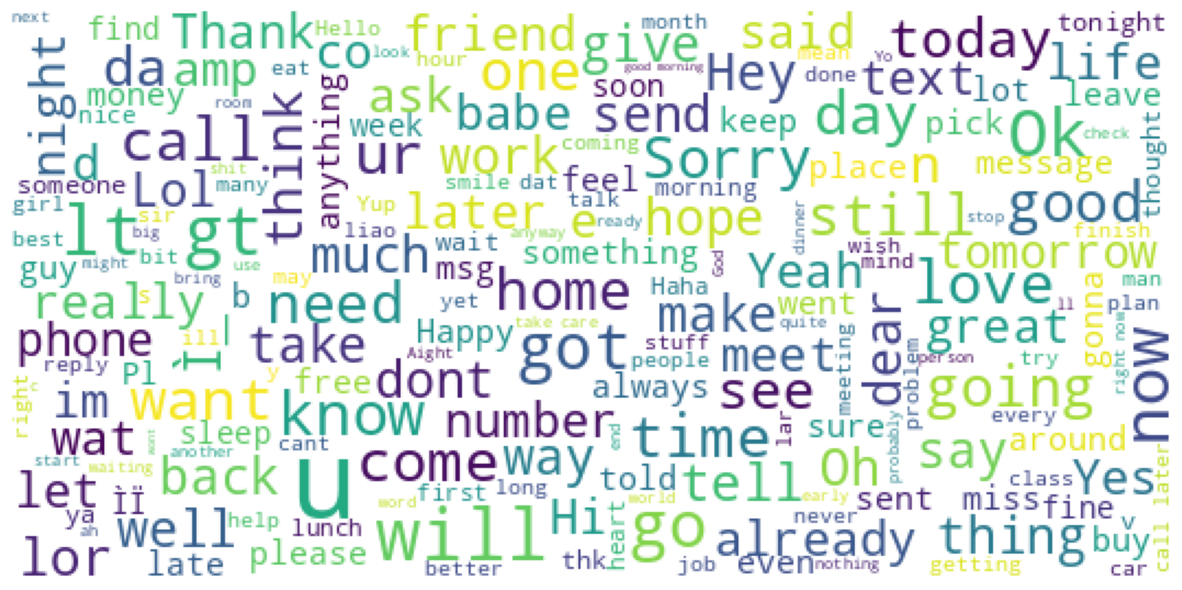

In [24]:

#WordCloud for Ham messages
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
ham_sms_cloud = WordCloud(width =530, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white").generate(ham_sms)
plt.figure(figsize=(15,15))
plt.imshow(ham_sms_cloud)
plt.axis('off')
plt.show()

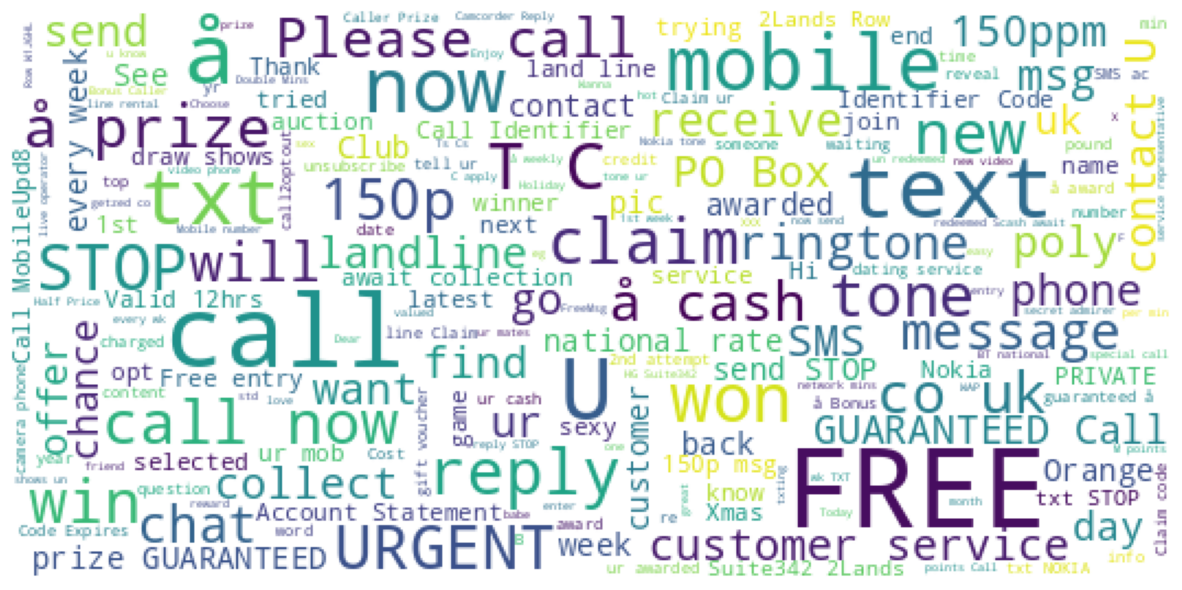

In [25]:
#Putting all spam messages into a list and converting it to a string
spam_sms = " ".join(dfspam.SMS.to_numpy().tolist())


#WordCloud for Spam messages
spam_sms_cloud = WordCloud(width =530, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white").generate(spam_sms)
plt.figure(figsize=(15,15))
plt.imshow(spam_sms_cloud)
plt.axis('off')
plt.show()


In [26]:

#We sample ham messages using length of spam messages so that we hae an equal distribution
dfham_sample=dfham.sample(dfspam.shape[0])

In [27]:

dfham_sample.shape

(747, 4)

In [28]:
df_balance=pd.concat([dfham_sample,dfspam],axis=0)

In [29]:
df_balance.shape

(1494, 4)

In [30]:
#Balanced dataset that has 747 Ham messages and 747 Spam messages.
df_balance.head()

,Label,SMS,Label_number,length
4900,ham,Taka lor. Wat time u wan 2 come n look 4 us?,0,44
3111,ham,Just haven't decided where yet eh ?,0,35
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,0,152
2040,ham,You always make things bigger than they are,0,43
4528,ham,"Hiya, probably coming home * weekend after next",0,47


In [31]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string
def clean(txt):
    #Convert to lower case
    txt = str(txt).lower()
    #Remove Stopwords
    stopword1 = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    #Remove Punctuations
    punc = [char for char in txt if char not in string.punctuation]
    punc = ''.join(punc)
    clean_stopwords = [word for word in punc.split() if word.lower() not in stopword1]
    cleanwords = ""
    #Stemming using Porter Stemmer
    for x in clean_stopwords:
        cleanwords += (PorterStemmer().stem(x)) + " "


    return txt

df_balance['clean_sms'] = df['SMS'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:

#Dataset with cleaned messages
df_balance.head()


,Label,SMS,Label_number,length,clean_sms
4900,ham,Taka lor. Wat time u wan 2 come n look 4 us?,0,44,taka lor. wat time u wan 2 come n look 4 us?
3111,ham,Just haven't decided where yet eh ?,0,35,just haven't decided where yet eh ?
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,0,152,hi hun! im not comin 2nite-tell every1 im sorr...
2040,ham,You always make things bigger than they are,0,43,you always make things bigger than they are
4528,ham,"Hiya, probably coming home * weekend after next",0,47,"hiya, probably coming home * weekend after next"


In [33]:

df_balance.dtypes

Label           object
SMS             object
Label_number     int64
length           int64
clean_sms       object
dtype: object

In [34]:
#We use cleaned SMS to predict the Label Number
X=df_balance['clean_sms']
Y=df_balance['Label_number']


#Splitting the, 80% of the dataset for training, remianing 20% for testing
from sklearn.model_selection import train_test_split
Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y,test_size=0.20,random_state=1)


print(Ytraining)

4820    0
48      0
1555    0
3007    1
3418    1
       ..
2938    0
1049    1
2557    1
3096    0
2266    1
Name: Label_number, Length: 1195, dtype: int64


In [35]:

from sklearn.feature_extraction.text import CountVectorizer
#Convert SMS Message into a matrix of token counts - using vectorizer
vect = CountVectorizer()
# learn training data vocabulary - fitting the training data
p=vect.fit(Xtraining)


#Transforming the Training data into a Document - Term Matrix
X_train = p.transform(Xtraining)
X_train

<1195x4061 sparse matrix of type '<class 'numpy.int64'>'
	with 20197 stored elements in Compressed Sparse Row format>

In [36]:
print(X_train)

  (0, 662)	1
  (0, 917)	1
  (0, 1821)	1
  (0, 1896)	1
  (0, 2028)	1
  (0, 3579)	1
  (0, 4033)	1
  (1, 815)	1
  (1, 828)	1
  (1, 950)	1
  (1, 1091)	1
  (1, 1286)	1
  (1, 1441)	1
  (1, 1966)	1
  (1, 2019)	1
  (1, 2096)	1
  (1, 2413)	1
  (1, 3711)	1
  (1, 4019)	1
  (2, 330)	1
  (2, 1103)	1
  (2, 1283)	1
  (2, 1428)	1
  (2, 1714)	1
  (2, 2098)	1
  :	:
  (1193, 2259)	1
  (1193, 2501)	1
  (1193, 4032)	1
  (1193, 4033)	1
  (1194, 315)	1
  (1194, 355)	1
  (1194, 629)	2
  (1194, 1227)	1
  (1194, 1240)	1
  (1194, 1541)	1
  (1194, 1544)	1
  (1194, 1712)	1
  (1194, 1718)	1
  (1194, 1734)	1
  (1194, 2071)	1
  (1194, 2148)	1
  (1194, 2644)	1
  (1194, 2720)	1
  (1194, 3200)	1
  (1194, 3543)	1
  (1194, 3561)	1
  (1194, 3623)	1
  (1194, 3889)	1
  (1194, 3973)	1
  (1194, 3997)	1


In [37]:

vect1 = CountVectorizer()
# learn training data vocabulary
p1=vect1.fit(Xtraining)
#Transforming the testing data into a Document - Term matrix
X_test = p1.transform(Xtesting)
X_test


<299x4061 sparse matrix of type '<class 'numpy.int64'>'
	with 4478 stored elements in Compressed Sparse Row format>

In [38]:
print(X_test)

  (0, 1522)	1
  (0, 2635)	1
  (0, 2735)	1
  (0, 3550)	1
  (1, 1274)	1
  (1, 2086)	2
  (1, 2419)	1
  (1, 3935)	1
  (2, 837)	1
  (2, 1032)	1
  (2, 1060)	1
  (2, 1173)	1
  (2, 1208)	1
  (2, 1393)	1
  (2, 1734)	1
  (2, 2508)	1
  (2, 2580)	1
  (2, 2687)	1
  (2, 3153)	1
  (2, 3191)	1
  (2, 3623)	1
  (2, 3719)	1
  (2, 3949)	1
  (2, 3997)	1
  (2, 4033)	1
  :	:
  (296, 3561)	1
  (296, 3623)	1
  (296, 3703)	1
  (296, 3704)	1
  (296, 3973)	1
  (296, 4037)	1
  (297, 140)	1
  (297, 485)	2
  (297, 486)	1
  (297, 859)	1
  (297, 1071)	1
  (297, 1114)	1
  (297, 1181)	1
  (297, 1564)	1
  (297, 2455)	1
  (297, 2701)	1
  (297, 2831)	1
  (297, 2833)	1
  (297, 3623)	2
  (298, 1428)	1
  (298, 1441)	1
  (298, 1858)	1
  (298, 2190)	1
  (298, 2331)	1
  (298, 2621)	1


In [39]:
#Using TF-IDF (Term Frequency - Inverse Document Frequency) to evaluate the importance of a word to a document
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
q=tfidf_transformer.fit(X_train)
X_train_tfidf = q.transform(X_train)


tfidf_transformer = TfidfTransformer()
q2=tfidf_transformer.fit(X_test)
X_test_tfidf = q2.transform(X_test)

In [40]:
#Importing Naive Bayes library from sklearn
from sklearn.naive_bayes import MultinomialNB


#Initializing Naive Bayes
nb=MultinomialNB()


#Fitting the model with training data
nb.fit(X_train_tfidf, Ytraining)

MultinomialNB()

In [41]:
#Predictions on the testing data
nb_pred = nb.predict(X_test_tfidf)


#predicitons
print(nb_pred)

[0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1
 1 1 0]


In [42]:
#Acuuracy of the trained model
from sklearn.metrics import accuracy_score
nb_score = accuracy_score(Ytesting, nb_pred)
print(nb_score)


0.9632107023411371


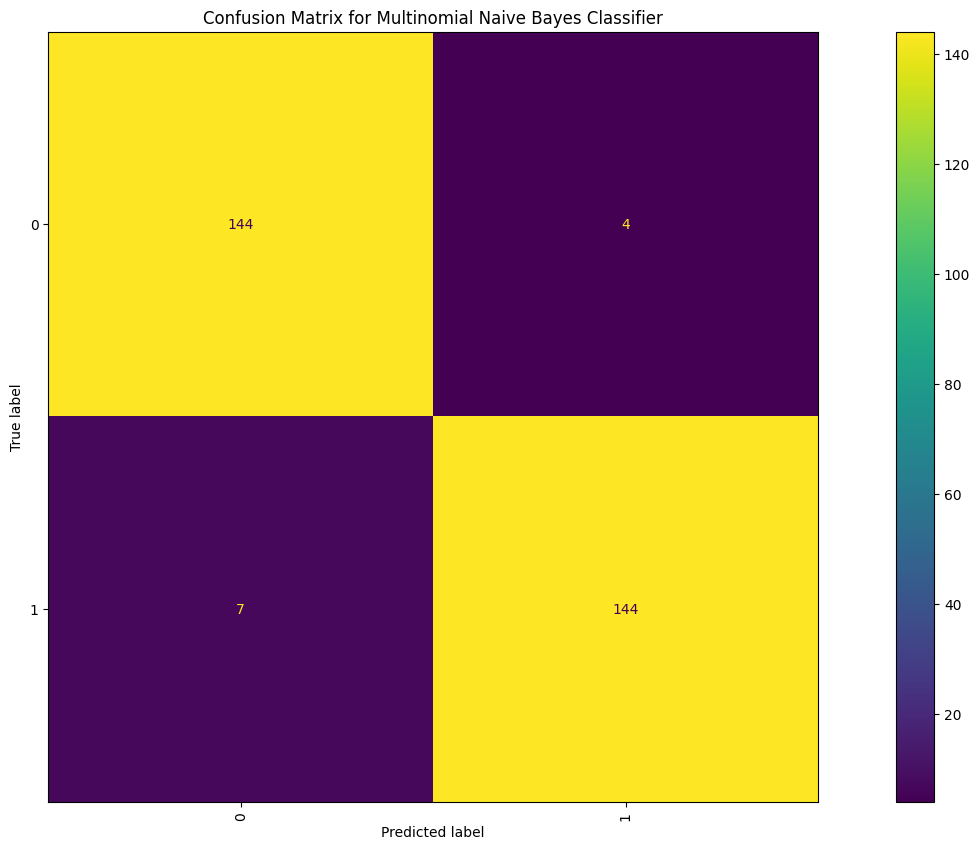

In [43]:
#Dataframe Real vs predicted values for testing data
pred_dataframe=pd.DataFrame({'Real':Ytesting.ravel(),'Predicted':nb_pred.ravel()})


#Confusion Matrix predicted vs True label
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Multinomial Naive Bayes Classifier")
nb_conf = confusion_matrix(pred_dataframe['Real'],pred_dataframe['Predicted'])
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_conf,display_labels = nb.classes_)
nb_display.plot(xticks_rotation ='vertical',ax=ax1,)
plt.grid(False)
plt.show()

In [44]:
#Importing and initializing Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')


#Fitting training data into the model for learning
lr.fit(X_train_tfidf, Ytraining)

LogisticRegression(solver='liblinear')

In [45]:
#Predictions on testing data
lr_pred = lr.predict(X_test_tfidf)


#Predicted values
print(lr_pred)

[0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0]


In [46]:

#Acuuracy
lr_score = accuracy_score(Ytesting, lr_pred)
print(lr_score)

0.959866220735786


In [47]:
#Dataframe Real vs predicted values for testing data
pred_dataframe1=pd.DataFrame({'Real':Ytesting.ravel(),'Predicted':lr_pred.ravel()})


pred_dataframe1.head()

,Real,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


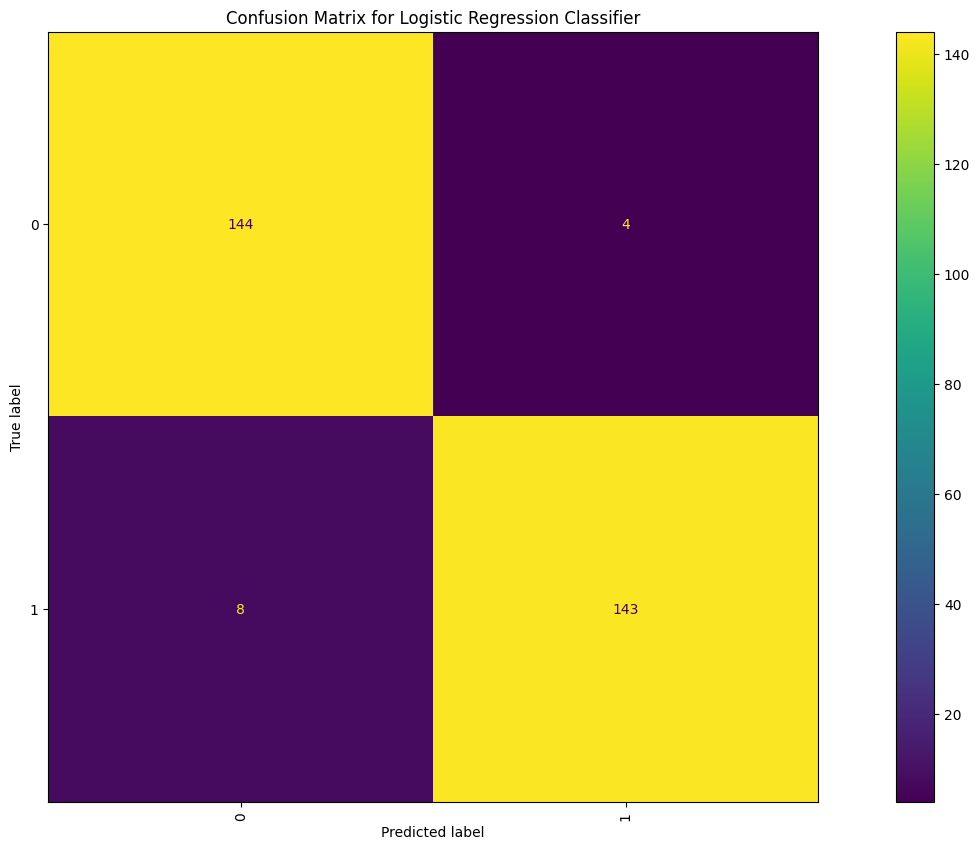

In [48]:
#Confusion Matrix predicted vs True label
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Logistic Regression Classifier")
lr_conf = confusion_matrix(pred_dataframe1['Real'],pred_dataframe1['Predicted'])
lr_display = ConfusionMatrixDisplay(confusion_matrix=lr_conf,display_labels = lr.classes_)
lr_display.plot(xticks_rotation ='vertical',ax=ax1)
plt.grid(False)
plt.show()

In [49]:
#Putting both accuracies into a list
acc_s=[]
acc_s.append(nb_score)
acc_s.append(lr_score)
models=["Naive Bayes", "Logistic Regression"]

In [50]:
#Displaying accuracies
for i in range(len(models)):
  print(models[i]+": "+str(acc_s[i]))

Naive Bayes: 0.9632107023411371
Logistic Regression: 0.959866220735786


Text(0, 0.5, 'Accuracy')

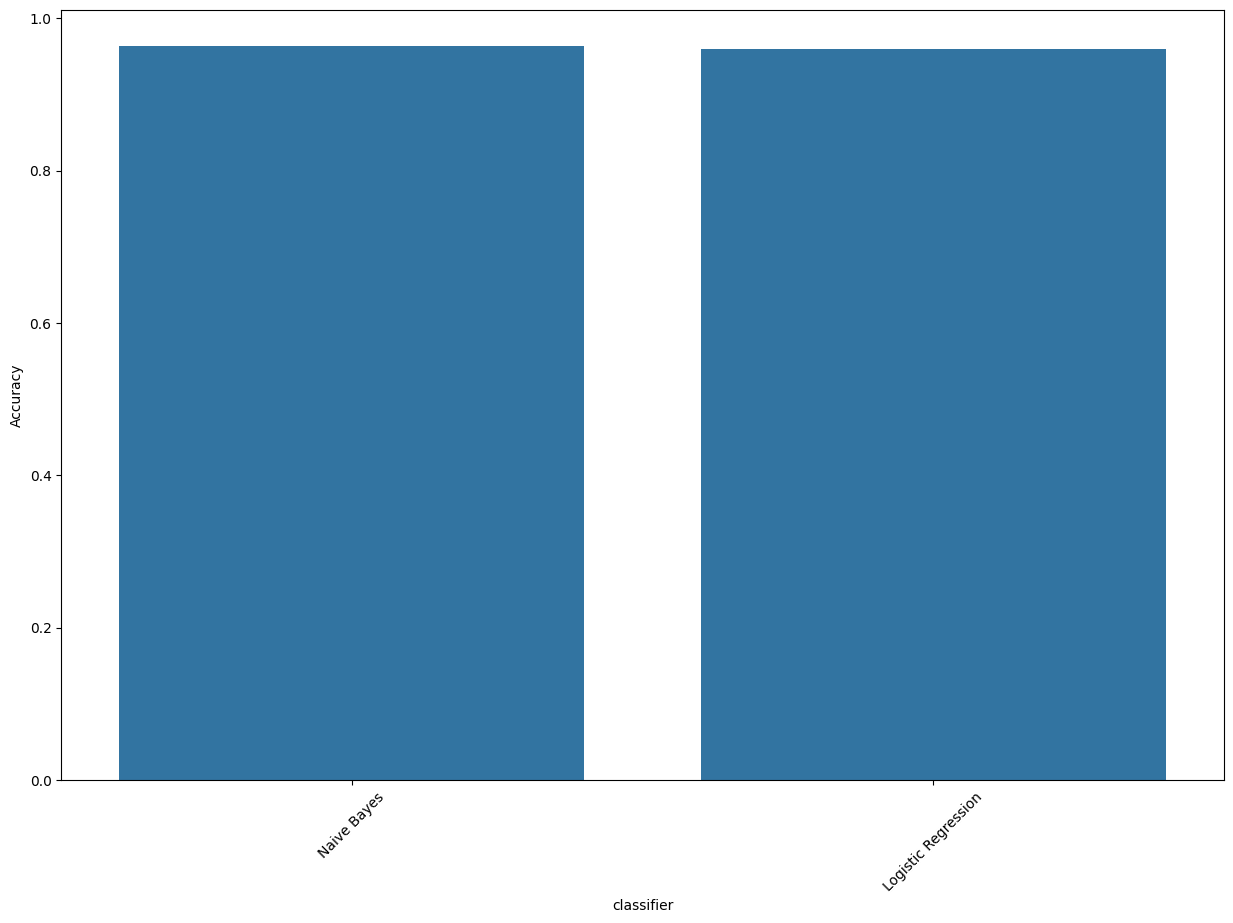

In [51]:
#Bar Graph of Accuracies
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(y=acc_s,x=models)
plt.xlabel('classifier')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')


In [52]:
#Predict class probabilites for every data point in Naive Bayes (infer class probabilites)
prob1=nb.predict_proba(X_test_tfidf)[:,1]


#Predict class probabilites for every data point in Naive Bayes
prob2=lr.predict_proba(X_test_tfidf)[:,1]


from sklearn.metrics import roc_curve, roc_auc_score

<ipython-input-53-67d94f2dc2d2>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


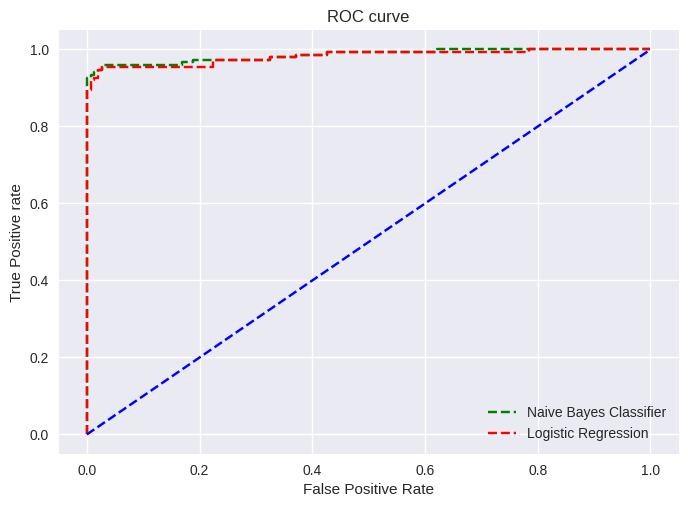

In [53]:
#ROC (Receiver Operating Charcteristic) Curve for Naive Bayes - False Positive Rate (1-Speicifity), True Posiitve Rate(Sensitivity), Probabilty threhold (e.g. 0.5)
#to evalaute models
fpr1, tpr1, thresh1 = roc_curve(Ytesting, prob1, pos_label=1)


#ROC for Logisitc Regression
fpr2, tpr2, thresh2 = roc_curve(Ytesting, prob2, pos_label=1)


#ROC Curve at fpr = tpr
random_probs = [0 for i in range(len(Ytesting))]
p_fpr, p_tpr, _ = roc_curve(Ytesting, random_probs, pos_label=1)


#Plotting ROC Curve
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Naive Bayes Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [54]:
#ROC - AUC Scores
print("Naive Bayes Classifier \t\t", roc_auc_score(Ytesting, prob1))
print("Logistic Regression \t\t", roc_auc_score(Ytesting, prob2))

Naive Bayes Classifier 		 0.9854573116162519
Logistic Regression 		 0.9821013066046178
